# Correlation, Scatter Plots and Linear Regression

In this notebook, we will look at the concept of correlation between two variables; a concept which allows us to deduce the relationship between two quantitative variables. We will also explore scatter plots, the visualisation tool of choice when it comes to deducing correlative relationships and take a brief look at Linear Regression.

Questions that can be answered through the correlation coefficient include:
* Are weights related to the height of a person?
* Is there any relationship between the number of views and the number of comments on a YouTube video?
* Is the revenue of a movie higher if the budget is higher and vice versa?

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')

# Iris data

The famous iris dataset (published by Ronald Fisher in 1936) is a great way of demonstrating the correlations between continuous variables in machine learning. In some ways it's the "Hello world" of machine learning.

The data is simple, and it's possible to get high accuracy with an extremely simple classifier. 

The iris dataset is built into many machine learning libraries. We are using the one pre-loaded in seaborn.

In [8]:
iris = sns.load_dataset("iris")
iris.head(3)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

Each datapoint has five pieces of data. Four are standard measurements of the flower's size (in centimeters), and the fifth is the species of iris. There are three species: setosa, verscicolor and virginica. Our job is to build a classifier that, given the two petal and two sepal measurements.

## Importance of correlation in regression.

Multivariable statistical methods, such as multiple linear or logistic regression, have become widely used to analyse data. However, one common problem is the occurance of explanatory variabes which are not indepent, that is the coorrelations among covariates are not zero. 

When there are more than two covariates that are highly correlated, it is known as multicollinearity. Collinearity and multicollinearity can seriously distort the interpretation of a model.

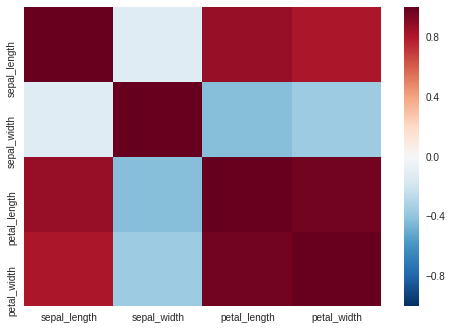

In [13]:
corr = iris.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## Correlation heatmap
This plot is known as correlation heatmap. It helps in visually analysing the correlation between features. High positive values demonstrate positive correlation between variables while negative values demonstrate the negative correlation.

We can see that the bivariate petal_length and petal_width are highly positively correlated while the bivariate sepal_width and sepal_length are not correlated. 

## Visualising the pairwise relationships in a dataset
To plot multiple pairwise bivariate distributions in a dataset, one can use the sns.pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame.

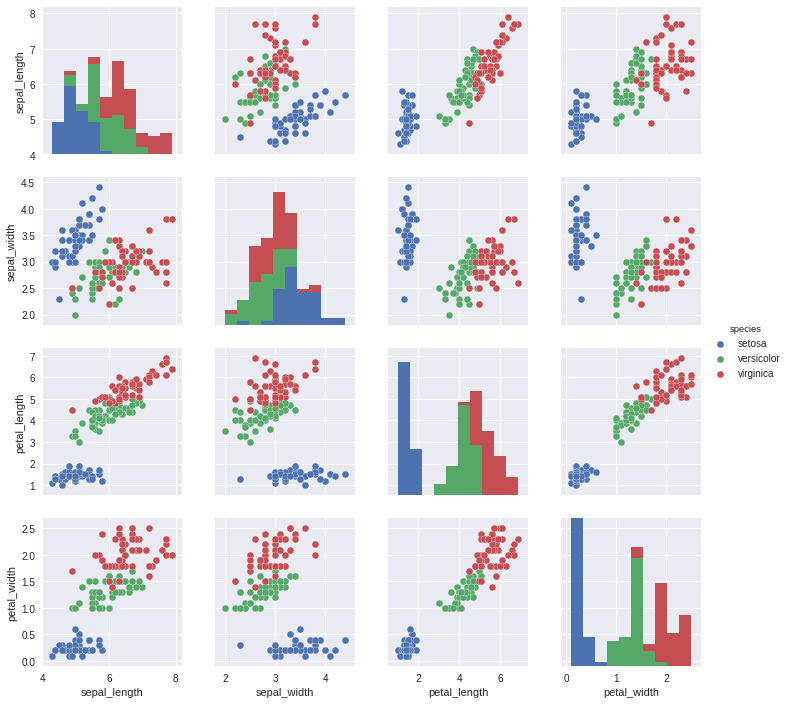

In [17]:
sns.pairplot(iris, hue='species')
plt.show()


### Split the data for training and testing

Data can be divided as train and test data. 
Train data is used to train the machine learning model while the test data is used to measure the performance of the model. Usually the train and test data is divided in ratio of 0.2-0.3. 

First, it is required to pull the raw data out of the iris dataframe. The petal and sepal data will be stored in an array X and the species labels in a corresponding array y. 

It is simple to split data into train and test set by hand, but is also built into scikit-learn as the train_test_split() function.


In [18]:
X = iris.values[:, :4]
y = iris.values[:, 4]

In [29]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, random_state=0)

## Training a scikit-learn classifier

Like all scikit-learn Estimator objects, a LogisticRegressionCV classifier has a .fit() method that takes care of the gory numerical details of learning model parameters that best fit the training data.

In [30]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [31]:
print(lr.score(test_X, test_y))

0.977777777778
